In [ ]:
#Data Collection

In [ ]:
#load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#reading csv files
df = pd.read_csv("D:\Study Materials\Data_CyberPro\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

In [4]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
#Data Preprocessing

#1.Data Cleaning

In [ ]:
#missing values

In [5]:
missing_values = df.isnull().sum()
missing_values

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [ ]:
#percentage of the null values

In [6]:
pd.set_option('display.max_rows', None)  #displays all rows and columns
pd.set_option('display.max_columns', None)

missing_percentage = df.isnull().mean() * 100 
missing_percentage

 Destination Port               0.000000
 Flow Duration                  0.000000
 Total Fwd Packets              0.000000
 Total Backward Packets         0.000000
Total Length of Fwd Packets     0.000000
 Total Length of Bwd Packets    0.000000
 Fwd Packet Length Max          0.000000
 Fwd Packet Length Min          0.000000
 Fwd Packet Length Mean         0.000000
 Fwd Packet Length Std          0.000000
Bwd Packet Length Max           0.000000
 Bwd Packet Length Min          0.000000
 Bwd Packet Length Mean         0.000000
 Bwd Packet Length Std          0.000000
Flow Bytes/s                    0.011739
 Flow Packets/s                 0.000000
 Flow IAT Mean                  0.000000
 Flow IAT Std                   0.000000
 Flow IAT Max                   0.000000
 Flow IAT Min                   0.000000
Fwd IAT Total                   0.000000
 Fwd IAT Mean                   0.000000
 Fwd IAT Std                    0.000000
 Fwd IAT Max                    0.000000
 Fwd IAT Min    

In [ ]:
#one more method to find the missing values

In [7]:
missing_percentage = df.isnull().mean() * 100  # Display Only Columns with Missing Values
missing_percentage[missing_percentage > 0]

Flow Bytes/s    0.011739
dtype: float64

In [ ]:
#fill the missing values with mean or median

In [8]:
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)

In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display only columns that have missing values
missing_percentage[missing_percentage > 0]

Series([], dtype: float64)

In [ ]:
#call the columns if there is any null value are there or not

In [10]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
missing_values = df.isnull().sum()
missing_values

 Destination Port               0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
 Bwd Packet Length Std          0
Flow Bytes/s                    0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Std                    0
 Fwd IAT Max                    0
 Fwd IAT Min                    0
Bwd IAT Total                   0
 Bwd IAT Mean                   0
 Bwd IAT Std                    0
 Bwd IAT Max                    0
 Bwd IAT Min  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170366 non-null  int64  
 1    Flow Duration                170366 non-null  int64  
 2    Total Fwd Packets            170366 non-null  int64  
 3    Total Backward Packets       170366 non-null  int64  
 4   Total Length of Fwd Packets   170366 non-null  int64  
 5    Total Length of Bwd Packets  170366 non-null  int64  
 6    Fwd Packet Length Max        170366 non-null  int64  
 7    Fwd Packet Length Min        170366 non-null  int64  
 8    Fwd Packet Length Mean       170366 non-null  float64
 9    Fwd Packet Length Std        170366 non-null  float64
 10  Bwd Packet Length Max         170366 non-null  int64  
 11   Bwd Packet Length Min        170366 non-null  int64  
 12   Bwd Packet Length Mean       170366 non-nul

In [12]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [13]:
#Encoding & Feature Seclection
selected_columns = [
    ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 
    'Total Length of Fwd Packets', ' Total Length of Bwd Packets', 
    ' Fwd Packet Length Max', 'Bwd Packet Length Max', 'Flow Bytes/s', ' Flow Packets/s',
    ' Flow IAT Min', ' Fwd IAT Min', ' Flow IAT Std', ' Bwd IAT Std',
    ' Active Min', 'Idle Mean', ' Active Max', ' Idle Max', ' Label'
]

# Creating a new DataFrame with the selected columns
df_filtered = df[selected_columns]

# Encoding the Labels column: BENIGN = 0, MALICIOUS = 1 (or any other appropriate encoding)
df_filtered[' Label'] = df_filtered[' Label'].map({'BENIGN': 0, 'Web Attacks': 1})

# Display the cleaned and encoded dataset
df_filtered.head()

C:\Users\ashim\AppData\Local\Temp\ipykernel_19176\4244249797.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[' Label'] = df_filtered[' Label'].map({'BENIGN': 0, 'Web Attacks': 1})


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Bwd Packet Length Max,Flow Bytes/s,Flow Packets/s,Flow IAT Min,Fwd IAT Min,Flow IAT Std,Bwd IAT Std,Active Min,Idle Mean,Active Max,Idle Max,Label
0,113095465,48,24,9668,10012,403,923,1.740123e+02,0.636630,3,3,4.597265e+06,7.084368e+06,379,13800000.0,1629110,16500000,0
1,113473706,68,40,11364,12718,403,1139,2.122254e+02,0.951762,2,2,3.813685e+06,5.922355e+06,325,13800000.0,1424245,16500000,0
2,119945515,150,0,0,0,0,0,0.000000e+00,1.250568,0,0,5.277837e+06,0.000000e+00,6,24400000.0,20400000,60100000,0
3,60261928,9,7,2330,4221,1093,1460,1.087088e+02,0.265508,1,311,1.550000e+07,2.750433e+04,0,0.0,0,0,0
4,269,2,2,102,322,51,161,1.576208e+06,14869.888480,4,4,1.483790e+02,0.000000e+00,0,0.0,0,0,0


In [14]:
#importing Ml model
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
#Anomaly detection
# Replace infinite values with NaN
df_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (or you can choose to fill them with the mean/median)
df_filtered.dropna(inplace=True)

# Alternatively, you can scale down the features to avoid very large numbers
from sklearn.preprocessing import StandardScaler

# Separating features and labels again after cleaning
X = df_filtered.drop(columns=[' Label'])
y = df_filtered[' Label']

# Scaling the features to handle large values (normalizing the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\ashim\AppData\Local\Temp\ipykernel_19176\275395291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\ashim\AppData\Local\Temp\ipykernel_19176\275395291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


In [16]:

# Now splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Re-training the model with the cleaned and scaled data
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Converting predictions to match the label encoding (1 = MALICIOUS, 0 = BENIGN)
y_pred = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluating the model
print(classification_report(y_test, y_pred, target_names=['BENIGN','Web Attacks']))

              precision    recall  f1-score   support

      BENIGN       0.99      0.90      0.94     33603
 Web Attacks       0.01      0.04      0.01       444

    accuracy                           0.89     34047
   macro avg       0.50      0.47      0.48     34047
weighted avg       0.97      0.89      0.93     34047



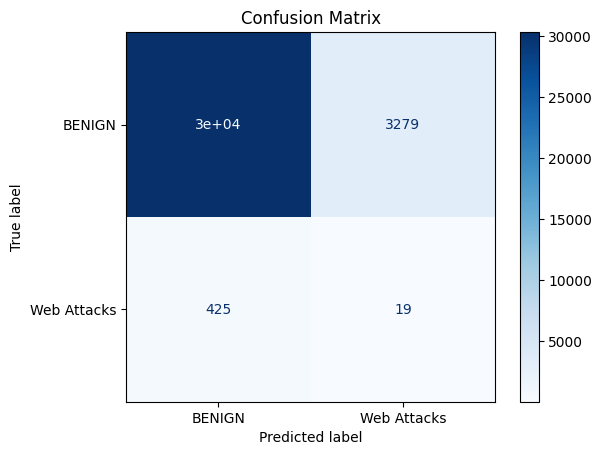

In [17]:
#model evaluation
#confusionmatrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['BENIGN', 'Web Attacks'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [18]:
import pandas as pd
data = pd.read_csv("D:\Study Materials\Data_CyberPro\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
unique_labels = data[' Label'].unique()
print(unique_labels)

['BENIGN' 'Web Attacks']
